In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd 
from tqdm import tqdm  
import os 
import statsmodels.api as sm  
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu,ttest_ind

gut=[
'麦胶蛋白抗体'
,'组织转麸胺酶抗体'
,'分泌型免疫球蛋白'
,'钙卫蛋白'
,'解连蛋白'
,'葡萄糖醛酸酶'
,'胰弹性蛋白酶']

gut_english = ['Anti-gliadin slgA', 'Anti-htTG slgA', 
       'slgA', 'Calprotectin', 'Zonulin', 
       'Beta-Glucuronidase', 'Pancreatic Elastase']

organic_acid=['尿肌酐-1073'
,'46. 阿拉伯糖醇'
,'45. 酒石酸'
,'44. 柠苹酸'
,'43. 丙三羧酸'
,'42. 二羟基苯丙酸'
,'41. 吲哚乙酸'
,'40. 4-羟基苯乙酸'
,'39. 4-羟基苯甲酸'
,'38. 苯丙酸'
,'37. 苯乙酸'
,'36. 马尿酸'
,'35. 苯甲酸'
,'34. 乳清酸'
,'33. 焦谷氨酸'
,'32. α-羟丁酸'
,'31. 葡萄糖二酸'
,'30. 苯基乙醛酸'
,'29. 杏仁酸'
,'28. 2-甲基马尿酸'
,'1. 己二酸'
,'2. 辛二酸'
,'3. 乙基丙二酸'
,'4. 丙酮酸'
,'5. 乳酸'
,'6. β-羟基丁酸'
,'7. 柠檬酸'
,'8. 顺式乌头酸'
,'9. 异柠檬酸'
,'10. α-酮戊二酸'
,'11. 琥珀酸'
,'12. 富马酸'
,'13. 苹果酸'
,'14. 羟甲基戊二酸'
,'15. α-酮异戊酸'
,'16. α-酮异己酸'
,'17. α-酮-β-甲基戊酸'
,'18. 黄尿酸'
,'19. β-羟基异戊酸'
,'20. 甲基丙二酸'
,'22. 高香草酸'
,'23. 香草基扁桃酸'
,'24. 5-羟吲哚乙酸'
,'25. 犬尿喹啉酸'
,'26. 吡啶甲酸'
,'27. 喹啉酸'
,'21. 亚胺甲基谷氨酸'
]

organic_acid_english = ['Urinary creatinine', 'Arabitol', 'Tartaric acid', 'Citric acid',
                 'Tricarboxylic acid', 'Dihydroxyphenylacetic acid', 'Indole-3-acetic acid',
                 '4-Hydroxyphenylacetic acid', '4-Hydroxybenzoic acid', 'Phenylpropanoic acid',
                 'Phenylacetic acid', 'Hippuric acid', 'Benzoic acid', 'Lactic acid',
                 'Fumaric acid', 'α-Hydroxybutyric acid', 'Glucaric acid',
                 'Phenylacetaldehyde acid', 'Mandelic acid', '2-Methylhippuric acid',
                 'Hexanedioic acid', 'Octanedioic acid', 'Ethylmalonic acid',
                 'Pyruvic acid', 'Lactic acid', 'β-Hydroxybutyric acid',
                 'Citric acid', 'Cis-aconitic acid', 'Isocitric acid',
                 'α-Ketoglutaric acid', 'Succinic acid', 'Fumaric acid',
                 'Malic acid', 'Hydroxymethyl glutaric acid',
                 'α-Ketoisovaleric acid', 'α-Ketoisocaproic acid',
                 'α-Keto-β-methylvaleric acid', 'Uric acid',
                 'β-Hydroxyisovaleric acid', 'Methylmalonic acid',
                 'Vanillic acid', 'Vanilloylmandelic acid',
                 '5-Hydroxyindole-3-acetic acid', 'Kynurenic acid',
                 'Pyridinecarboxylic acid', 'Quinolinic acid',
                 'Imidazole methyl glutamic acid']

cytokine=['干扰素α'
,'肿瘤坏死因子'
,'干扰素γ'
,'白介素12'
,'白介素1β'
,'白介素17'
,'白介素10'
,'白介素8'
,'白介素6'
,'白介素5'
,'白介素4'
,'白介素2'
]

cytokine_english = [
    'IFN-α', 'TNF', 'IFN-γ',
    'IL-12', 'IL-1β', 'IL-17',
    'IL-10', 'IL-8', 'IL-6',
    'IL-5', 'IL-4', 'IL-2'
]

oxidative=[
'8-羟基脱氧鸟苷'
,'丙二醛'
,'谷胱甘肽'
,'含硫化合物'
,'谷胱甘肽硫转移酶'
,'谷胱甘肽过氧化物酶'
,'超氧化物歧化酶'
,'花生四烯酸过氧化物'
,'硝化酪氨酸']


oxidative_english = [
    '8-OHdG', 
    'MDA', 
    't-GSH', 
    'f-Thiol', 
    'GSTs', 
    'GSHPx', 
    'SOD',  
    'F2-losPs', 
    'Nitrotyrosine'  
]

Hormone=[
'三氯沙'
,'双酚A'
,'单甲基酯'
,'单乙基酯'
,'单丁基酯'
,'单苄基酯'
,'单乙基己基酯'
,'甲酯'
,'乙酯'
,'丙酯'
,'丁酯'
,'壬基苯酯'
,'辛基苯酯'
,'丁基苯酯'
]

Hormone_english = ['Triclosan', 'Bisphenol A', 'Monomethyl ester', 'Monoethyl ester', 'Monobutyl ester', 'Monobenzyl ester', 
            'Monooctyl ester', 'Methyl ester', 'Ethyl ester', 'Propyl ester', 'Butyl ester', 
            'Nonylphenol ester', 'Octylphenol ester', 'Butylphenol ester']

foodallergy=['牛奶'
,'玉米'
,'虾'
,'鳕鱼'
,'猪肉'
,'羊肉'
,'鸡肉'
,'牛肉'
,'蛋黄'
,'蛋白'
,'羊奶'
,'芒果'
,'香蕉'
,'苹果'
,'番茄'
,'土豆'
,'韭菜'
,'芹菜'
,'花生'
,'大豆/毛豆'
,'小麦'
,'鳗鱼'
,'鱿鱼'
,'蛤'
,'蟹'
,'鲍鱼'
,'鸭肉'
,'酸奶'
,'巧达芝士'
,'菠萝'
,'薏仁'
,'燕麦'
,'米'
,'麸质'
,'荞麦'
,'金枪鱼'
,'鱼翅'
,'鲑鱼'
,'牡蛎'
,'海带'
,'生姜'
,'大蒜'
,'辣椒'
,'可可豆'
,'芝麻'
,'核桃'
,'杏仁'
,'葵花籽'
,'绿豆'
,'花豆'
,'包心菜'
,'绿花椰菜'
,'竹笋'
,'芦笋'
,'茶'
,'咖啡'
,'香草'
,'蜂蜜'
,'酵母'
,'胡椒'
,'菠菜'
,'青椒/彩椒'
,'豌豆'
,'洋葱'
,'莴苣'
,'青葱'
,'茄子'
,'小黄瓜'
,'白花椰菜'
,'胡萝卜'
,'龙眼/桂圆'
,'柠檬'
,'奇异果'
,'番石榴'
,'葡萄柚'
,'葡萄'
,'蘑菇'
,'芋头'
,'地瓜'
,'四季豆'
,'酪梨'
,'椰子'
,'西瓜'
,'草莓'
,'樱桃'
,'梨子'
,'桃子'
,'木瓜'
,'柑橘类'
,'橄榄'
,'免疫球蛋白E'
            ]

foodallergy_english= ['Milk', 'Corn', 'Shrimp', 'Cod', 'Pork', 'Lamb', 'Chicken', 'Beef', 'Egg yolk', 'Egg white', 
                'Sheep milk', 'Mango', 'Banana', 'Apple', 'Tomato', 'Potato', 'Garlic chives', 
                'Celery', 'Peanut', 'Soybean/Edamame', 'Wheat', 'Eel', 'Squid', 'Clam', 'Crab', 
                'Abalone', 'Duck', 'Yogurt', 'Cheddar cheese', 'Pineapple', 'Coixseed', 
                'Oats', 'Rice', 'Gluten', 'Buckwheat', 'Tuna', 'Shark fin', 'Salmon', 'Oyster', 
                'Kelp', 'Ginger', 'Garlic', 'Chili', 'Cocoa bean', 'Sesame', 'Walnut', 
                'Almond', 'Sunflower seed', 'Mung bean', 'Scarlet runner bean', 'Cabbage', 
                'Broccoli', 'Bamboo shoots', 'Asparagus', 'Tea', 'Coffee', 'Vanilla', 
                'Honey', 'Yeast', 'Pepper', 'Spinach', 'Bell pepper', 'Pea', 'Onion', 
                'Lettuce', 'Green onion', 'Eggplant', 'Cucumber', 'Cauliflower', 'Carrot', 
                'Longan', 'Lemon', 'Kiwi', 'Guava', 'Grapefruit', 'Grape', 'Mushroom', 
                'Taro', 'Sweet potato', 'Green bean', 'Avocado', 'Coconut', 'Watermelon', 
                'Strawberry', 'Cherry', 'Pear', 'Peach', 'Papaya', 'Citrus fruits', 
                'Olive', 'Immunoglobulin E']

VD=['维生素D'
,'维生素D3'
,'维生素D2']

VD_english=['Vitamin D', 'Vitamin D3', 'Vitamin D2']


eng_chi_dict=dict(zip(gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone
,gut_english+organic_acid_english+cytokine_english+oxidative_english+foodallergy_english+VD_english+Hormone_english))

In [4]:
path='Allchip_ORmodif_vaf>0.1.csv'
dfresultR=pd.read_csv(path,index_col=0)
dfresultR = dfresultR.sort_values(by='OR',ascending=False)
dfresultR

,OR,LCI,HCI,index,gene2_formatted
chr5-34191582-34191582-G-A-LOC646652,41.000000,5.639808,298.059776,chr5-34191582-34191582-G-A-LOC646652,chr5:g.34191582G>A
chr2-85570186-85570186-G-A-RETSAT,24.000000,3.246813,177.404723,chr2-85570186-85570186-G-A-RETSAT,chr2:g.85570186G>A
chrX-73811695-73811695-A-G-RLIM,23.000000,3.106124,170.308719,chrX-73811695-73811695-A-G-RLIM,chrX:g.73811695A>G
chr5-34190915-34190915-C-G-LOC646652,21.000000,5.083524,86.750851,chr5-34190915-34190915-C-G-LOC646652,chr5:g.34190915C>G
chr5-122737709-122737709-C-T-CEP120,21.000000,5.083524,86.750851,chr5-122737709-122737709-C-T-CEP120,chr5:g.122737709C>T
...,...,...,...,...,...
chr16-32077240-32077240-T-C-LOC102723753,1.789474,1.020737,3.137161,chr16-32077240-32077240-T-C-LOC102723753,chr16:g.32077240T>C
chr16-32077240-32077240-T-C-ZNF267,1.789474,1.020737,3.137161,chr16-32077240-32077240-T-C-ZNF267,chr16:g.32077240T>C
chr1-148891790-148891790-T-A-NBPF25P,1.727273,1.021702,2.920100,chr1-148891790-148891790-T-A-NBPF25P,chr1:g.148891790T>A
chr1-148891790-148891790-T-A-LOC101927429,1.727273,1.021702,2.920100,chr1-148891790-148891790-T-A-LOC101927429,chr1:g.148891790T>A


In [5]:
dfresultR = dfresultR.reset_index().rename(columns={"index": "geneloci"})

In [6]:
all_gene_set = set(dfresultR['geneloci'])

In [7]:
csv_path='/home2/zhenglijing/work/annovar/data.csv'  
df_alldata = pd.read_csv(csv_path,encoding="GB2312")  
df_alldata

,检测项目,检测套餐,性别,病历号,年龄,结果数据,结果说明
0,尿肌酐-1073,全套有机酸代谢分析(尿液),女,ASD_B22,5,118.9,正常
1,46. 阿拉伯糖醇,全套有机酸代谢分析(尿液),女,ASD_B22,5,54.67,正常
2,45. 酒石酸,全套有机酸代谢分析(尿液),女,ASD_B22,5,3.06,偏高
3,44. 柠苹酸,全套有机酸代谢分析(尿液),女,ASD_B22,5,3.07,正常
4,43. 丙三羧酸,全套有机酸代谢分析(尿液),女,ASD_B22,5,2.43,偏高
...,...,...,...,...,...,...,...
7918,解连蛋白,肠道功能健康评估（粪便）,男,ASD_076,7,254,偏高
7919,钙卫蛋白,肠道功能健康评估（粪便）,男,ASD_076,7,208,偏高
7920,分泌型免疫球蛋白,肠道功能健康评估（粪便）,男,ASD_076,7,2977,偏高
7921,组织转麸胺酶抗体,肠道功能健康评估（粪便）,男,ASD_076,7,629,偏高


In [8]:
alldata_pivot=df_alldata[['检测项目','病历号','结果数据']].pivot_table(index='病历号', columns='检测项目', values='结果数据',aggfunc='sum')

alldata_pivot=alldata_pivot.replace('/','0').astype(float)

alldata_pivot=alldata_pivot.reset_index()

In [9]:
folder_path ='/home2/zhenglijing/work/annovar/deleAD/splitgene/'
df_ls=[]
for filename in os.listdir(folder_path):  
    if filename.endswith('.csv'):        file_path = os.path.join(folder_path, filename)  
        df=pd.read_csv(file_path)
        df_ls.append(df)
dfall=pd.concat(df_ls)

In [10]:
dfall['combine']=dfall['Chr'].astype(str)+'-'+dfall['Start'].astype(str)+'-'+dfall['End'].astype(str)+'-'+dfall['Ref'].astype(str)+'-'+dfall['Alt'].astype(str)+'-'+dfall['Gene.refGene'].astype(str)

In [11]:
for i in tqdm(all_gene_set):
    mutls=list(dfall[dfall['combine']==i]['type'])
    alldata_pivot[i]='nonmutant'
    alldata_pivot.loc[  alldata_pivot[alldata_pivot['病历号'].isin(mutls)].index  , i] ='mut'

100%|██████████| 286/286 [00:00<00:00, 412.62it/s]


In [12]:
mutls

['ASD']

In [13]:
alldata_pivot['type'] = alldata_pivot['病历号'].apply(lambda x: 'ASD' if 'ASD' in x else ('TD' if 'TD' in x else '其他'))

alldata_pivot

检测项目,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,17. α-酮-β-甲基戊酸,...,chr16-70163825-70163825-G-C-PDPR,chr7-63027366-63027366-C-T-LOC100287834,chr16-33534075-33534075-C-T-ENPP7P13,chr1-16976032-16976032-A-C-MST1P2,chr1-148903758-148903758-A-G-DRD5P2,chr15-20868230-20868230-T-C-GOLGA8CP,chr5-99715833-99715833-T-A-LOC100133050,chr1-148902223-148902223-G-A-DRD5P2,chr17-36339817-36339817-G-A-TBC1D3K,type
0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,0.68,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,0.49,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,0.44,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,0.55,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,0.66,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,TD_085,1.04,20.93,3.58,0.55,0.76,3.82,0.48,0.21,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD
65,TD_086,1.42,7.87,1.79,0.26,0.51,4.25,0.31,0.28,0.93,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD
66,TD_087,4.54,21.94,13.79,0.58,0.92,10.99,0.75,0.31,1.15,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD
67,TD_088,1.13,16.98,15.91,0.71,0.86,5.86,0.45,0.24,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD


In [14]:
merged_df=pd.read_csv('test_gene.csv',index_col=0) 
merged_df

,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,17. α-酮-β-甲基戊酸,...,chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6,chr12-31247819-31247819-A-G-DDX11,chr5-99715833-99715833-T-A-LOC100133050,chr6-58779097-58779097-A-G-LINC00680-GUSBP4,chr11-18290636-18290636-A-T-SAA1,chr7-72081604-72081604-G-T-TYW1B,chr2-112616040-112616040-T-C-ANAPC1,chr6-58779097-58779097-A-G-NONE,chr1-121484945-121484945-T-C-NONE,type
0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,0.68,...,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,0.49,...,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,0.44,...,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,mut,nonmutant,ASD
3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,0.55,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,ASD
4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,0.66,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,TD_085,1.04,20.93,3.58,0.55,0.76,3.82,0.48,0.21,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,TD
65,TD_086,1.42,7.87,1.79,0.26,0.51,4.25,0.31,0.28,0.93,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,TD
66,TD_087,4.54,21.94,13.79,0.58,0.92,10.99,0.75,0.31,1.15,...,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD
67,TD_088,1.13,16.98,15.91,0.71,0.86,5.86,0.45,0.24,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD


In [15]:
merged_df.columns[187:474]

Index(['number', 'chr17-36361992-36361992-C-T-LOC101929950',
       'chr16-21548095-21548095-G-A-SLC7A5P2',
       'chr1-144816621-144816621-A-G-NBPF8',
       'chrX-146341299-146341299-G-A-MIR509-3',
       'chr16-33379851-33379851-G-A-LOC390705',
       'chr1-16976223-16976223-C-T-MST1P2',
       'chr1-145282093-145282093-G-A-NOTCH2NLC',
       'chr16-33380263-33380263-C-G-LOC390705',
       'chr1-144874578-144874578-C-T-LOC100996724',
       ...
       'chr1-148891790-148891790-T-A-LOC101927429',
       'chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6',
       'chr12-31247819-31247819-A-G-DDX11',
       'chr5-99715833-99715833-T-A-LOC100133050',
       'chr6-58779097-58779097-A-G-LINC00680-GUSBP4',
       'chr11-18290636-18290636-A-T-SAA1', 'chr7-72081604-72081604-G-T-TYW1B',
       'chr2-112616040-112616040-T-C-ANAPC1',
       'chr6-58779097-58779097-A-G-NONE', 'chr1-121484945-121484945-T-C-NONE'],
      dtype='object', length=287)

## alternative='greater'

In [193]:
import pandas as pd
from scipy import stats

gene_sites = merged_df.columns[187:474]indicators = organic_acid
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative='greater')
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [194]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
for item in result_list:
    print(item)

['chr17-36361992-36361992-C-T-LOC101929950', '32. α-羟丁酸', 0.038711669621970465]
['chr1-144816621-144816621-A-G-NBPF8', '8. 顺式乌头酸', 0.043251789723005966]
['chr1-144816621-144816621-A-G-NBPF8', '21. 亚胺甲基谷氨酸', 0.03240065770025589]
['chr1-16976223-16976223-C-T-MST1P2', '44. 柠苹酸', 0.00998893186878319]
['chr1-16976223-16976223-C-T-MST1P2', '37. 苯乙酸', 0.043736393659882994]
['chr1-16976223-16976223-C-T-MST1P2', '32. α-羟丁酸', 0.016553857912377]
['chr1-16976223-16976223-C-T-MST1P2', '15. α-酮异戊酸', 0.012473904772341322]
['chr1-16976223-16976223-C-T-MST1P2', '20. 甲基丙二酸', 0.0395675858714327]
['chr16-33380263-33380263-C-G-LOC390705', '45. 酒石酸', 0.03174939181459678]
['chr16-33380263-33380263-C-G-LOC390705', '40. 4-羟基苯乙酸', 0.01537175417604993]
['chr16-33380263-33380263-C-G-LOC390705', '5. 乳酸', 0.04715875906150001]
['chr1-144874578-144874578-C-T-LOC100996724', '33. 焦谷氨酸', 0.04666727760623972]
['chr16-70177618-70177618-G-A-PDPR', '3. 乙基丙二酸', 0.025182318378495893]
['chr16-70177618-70177618-G-A-PDPR', '5. 乳

In [195]:
significantdf=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf

,geneloci,indicator,p_value
0,chr17-36361992-36361992-C-T-LOC101929950,32. α-羟丁酸,0.038712
1,chr1-144816621-144816621-A-G-NBPF8,8. 顺式乌头酸,0.043252
2,chr1-144816621-144816621-A-G-NBPF8,21. 亚胺甲基谷氨酸,0.032401
3,chr1-16976223-16976223-C-T-MST1P2,44. 柠苹酸,0.009989
4,chr1-16976223-16976223-C-T-MST1P2,37. 苯乙酸,0.043736
...,...,...,...
613,chr2-112616040-112616040-T-C-ANAPC1,42. 二羟基苯丙酸,0.044925
614,chr1-121484945-121484945-T-C-NONE,41. 吲哚乙酸,0.041386
615,chr1-121484945-121484945-T-C-NONE,5. 乳酸,0.041390
616,chr1-121484945-121484945-T-C-NONE,7. 柠檬酸,0.038363


In [197]:
significantdf.to_csv("acid_all.csv")

In [16]:
significantdf=pd.read_csv('acid_all.csv')

In [17]:
significantdf['eng']=significantdf['indicator'].map(eng_chi_dict)

In [18]:
list(significantdf['eng'].unique())

['α-Hydroxybutyric acid',
 'Cis-aconitic acid',
 'Imidazole methyl glutamic acid',
 'Citric acid',
 'Phenylacetic acid',
 'α-Ketoisovaleric acid',
 'Methylmalonic acid',
 'Tartaric acid',
 '4-Hydroxyphenylacetic acid',
 'Lactic acid',
 'Fumaric acid',
 'Ethylmalonic acid',
 'Arabitol',
 '4-Hydroxybenzoic acid',
 'Isocitric acid',
 'Vanillic acid',
 '5-Hydroxyindole-3-acetic acid',
 'Tricarboxylic acid',
 'Octanedioic acid',
 'Pyridinecarboxylic acid',
 'α-Ketoisocaproic acid',
 'Uric acid',
 'Dihydroxyphenylacetic acid',
 'Succinic acid',
 'Benzoic acid',
 'Malic acid',
 'Vanilloylmandelic acid',
 'Indole-3-acetic acid',
 'Hippuric acid',
 'β-Hydroxyisovaleric acid',
 'Kynurenic acid',
 'Quinolinic acid',
 'Glucaric acid',
 'α-Keto-β-methylvaleric acid',
 'α-Ketoglutaric acid',
 '2-Methylhippuric acid',
 'Hexanedioic acid',
 'Pyruvic acid',
 'β-Hydroxybutyric acid',
 'Urinary creatinine',
 'Hydroxymethyl glutaric acid',
 'Mandelic acid',
 'Phenylacetaldehyde acid',
 'Phenylpropanoic ac

In [19]:
len(list(significantdf['eng'].unique()))

44

In [20]:
pathway=pd.read_csv('pathway_results (1).csv',index_col=0)
pathway=pathway.rename({"#NAME?":'-log10p'},axis=1)
pathway

,Total,Expected,Hits,Raw p,-log10p,Holm adjust,FDR,Impact
Citrate cycle (TCA cycle),20,0.31407,8,1.210000e-10,9.91810,9.660000e-09,9.660000e-09,0.39695
"Alanine, aspartate and glutamate metabolism",28,0.43970,5,4.830000e-05,4.31570,3.818600e-03,1.933500e-03,0.05048
Glyoxylate and dicarboxylate metabolism,32,0.50251,5,9.490000e-05,4.02260,7.404100e-03,2.531300e-03,0.11000
"Valine, leucine and isoleucine biosynthesis",8,0.12563,3,1.821400e-04,3.73960,1.402500e-02,3.642800e-03,0.00000
Pyruvate metabolism,23,0.36118,4,3.431900e-04,3.46450,2.608300e-02,4.807300e-03,0.21967
Tyrosine metabolism,42,0.65955,5,3.605400e-04,3.44300,2.704100e-02,4.807300e-03,0.03213
Butanoate metabolism,15,0.23555,3,1.375800e-03,2.86150,1.018100e-01,1.572300e-02,0.00000
"Valine, leucine and isoleucine degradation",40,0.62814,4,2.955400e-03,2.52940,2.157400e-01,2.955400e-02,0.05516
Arginine biosynthesis,14,0.21985,2,1.920000e-02,1.71670,1.000000e+00,1.706600e-01,0.00000
Propanoate metabolism,22,0.34548,2,4.514400e-02,1.34540,1.000000e+00,3.611500e-01,0.00000


In [21]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

In [22]:
df.index

RangeIndex(start=0, stop=149, step=1)

In [23]:
['Citrate cycle (TCA cycle)',
       'Alanine, aspartate \nand glutamate metabolism',
       'Glyoxylate and dicarboxylate metabolism',
       'Valine, leucine and \nisoleucine biosynthesis', 'Pyruvate metabolism',
       'Tyrosine metabolism', 'Butanoate metabolism',
       'Valine, leucine and\n isoleucine degradation', 'Arginine biosynthesis',
       'Propanoate metabolism']

['Citrate cycle (TCA cycle)',
 'Alanine, aspartate \nand glutamate metabolism',
 'Glyoxylate and dicarboxylate metabolism',
 'Valine, leucine and \nisoleucine biosynthesis',
 'Pyruvate metabolism',
 'Tyrosine metabolism',
 'Butanoate metabolism',
 'Valine, leucine and\n isoleucine degradation',
 'Arginine biosynthesis',
 'Propanoate metabolism']

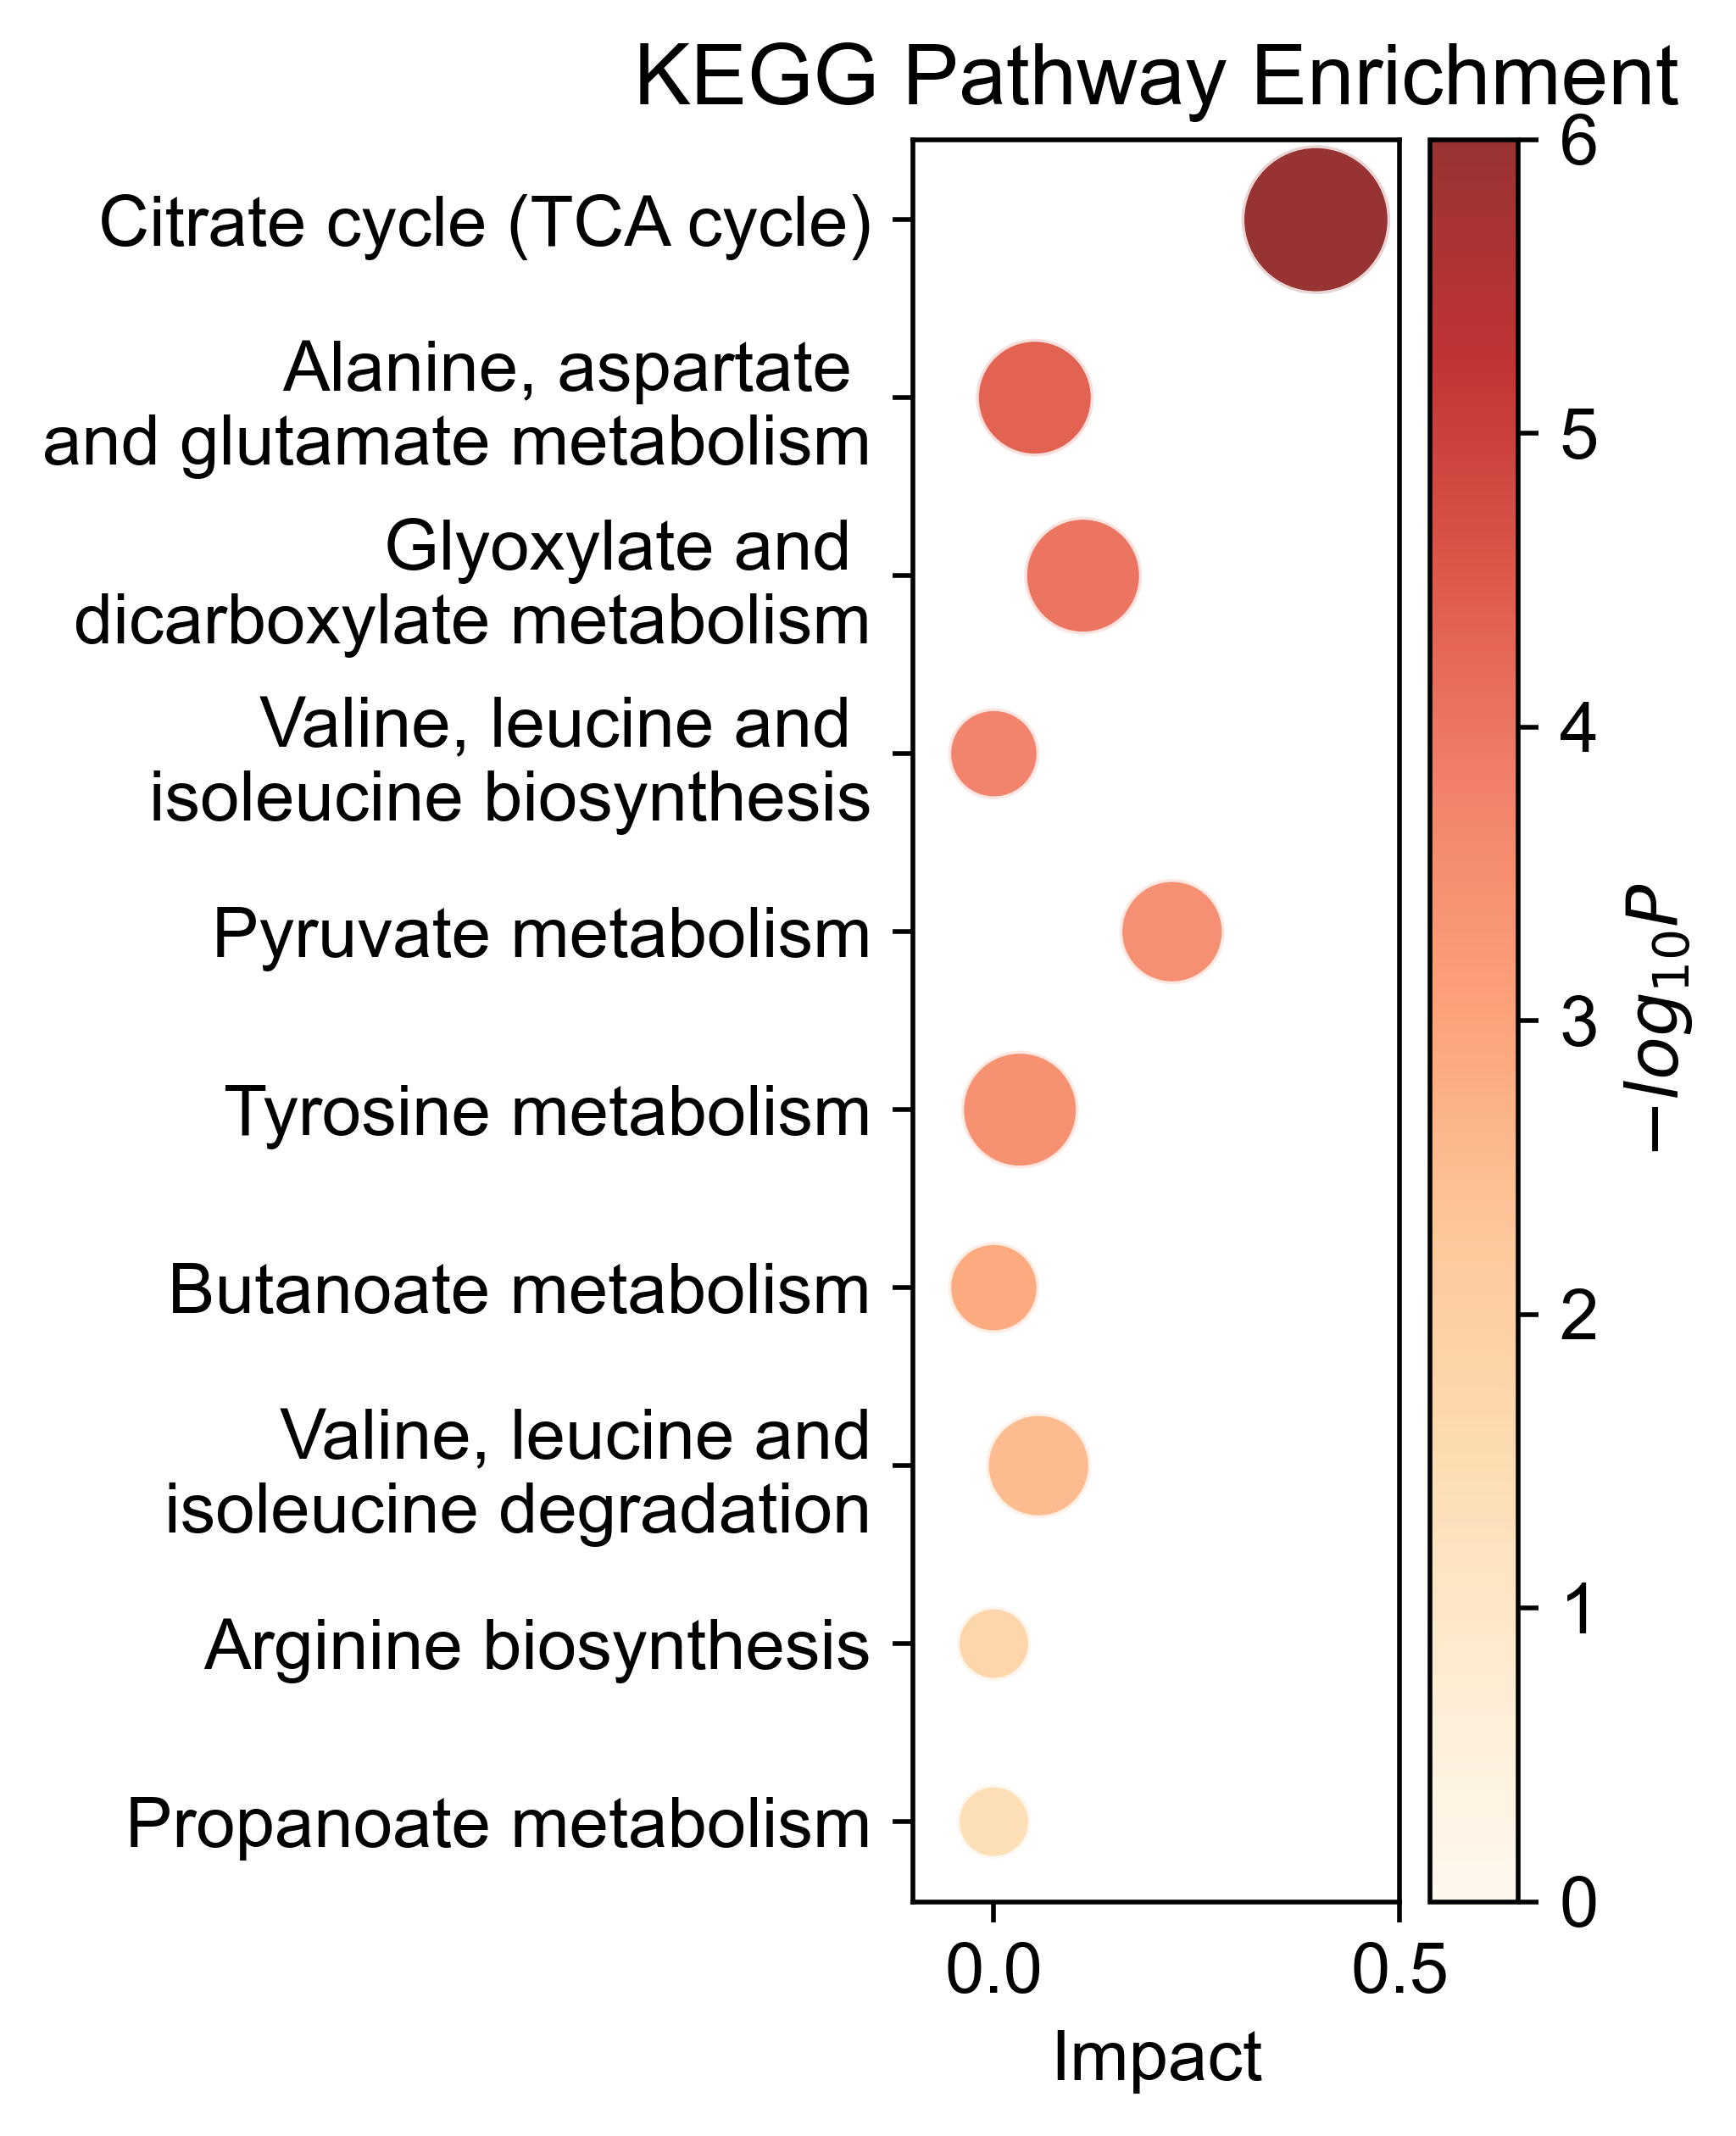

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'
df = pathway.iloc[:10]

plt.figure(figsize=(4, 5.2),dpi=500)
scatter = plt.scatter(
    
    df["Impact"],df.index,  
    s=df["Hits"] * 80,    c=df["-log10p"],    cmap="OrRd", vmin=0,
    vmax=6,    alpha=0.8,    edgecolors='w')

cbar = plt.colorbar(scatter)
cbar.set_label(r"$-log_{10}P$")

plt.title('KEGG Pathway Enrichment')
plt.xlabel('Impact')
plt.ylabel('')
plt.yticks(range(10),['Citrate cycle (TCA cycle)',
 'Alanine, aspartate \nand glutamate metabolism',
 'Glyoxylate and \ndicarboxylate metabolism',
 'Valine, leucine and \nisoleucine biosynthesis',
 'Pyruvate metabolism',
 'Tyrosine metabolism',
 'Butanoate metabolism',
 'Valine, leucine and\n isoleucine degradation',
 'Arginine biosynthesis',
 'Propanoate metabolism'])
plt.xlim(-0.1,0.5)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig('Fig3E.pdf', bbox_inches='tight')

plt.show()

In [ ]:
丙酸代谢精氨酸生物合成缬氨酸、亮氨酸和异亮氨酸降解丁酸代谢酪氨酸代谢丙酮酸代谢缬氨酸、亮氨酸和异亮氨酸生物合成乙醛酸和二羧酸代谢丙氨酸、天冬氨酸和谷氨酸代谢


In [67]:
merged_df[organic_acid+['type']]

,尿肌酐-1073,46. 阿拉伯糖醇,45. 酒石酸,44. 柠苹酸,43. 丙三羧酸,42. 二羟基苯丙酸,41. 吲哚乙酸,40. 4-羟基苯乙酸,39. 4-羟基苯甲酸,38. 苯丙酸,...,19. β-羟基异戊酸,20. 甲基丙二酸,22. 高香草酸,23. 香草基扁桃酸,24. 5-羟吲哚乙酸,25. 犬尿喹啉酸,26. 吡啶甲酸,27. 喹啉酸,21. 亚胺甲基谷氨酸,type
0,97.64,68.75,27.05,3.91,1.15,0.37,0.77,12.65,0.42,0.01,...,14.90,7.32,6.00,4.56,7.38,4.44,2.36,10.40,0.90,ASD
1,58.14,50.98,0.08,5.71,12.73,0.19,1.06,6.52,0.26,0.01,...,3.84,7.66,5.61,3.57,5.32,2.26,1.21,5.77,0.16,ASD
2,181.60,69.64,0.23,3.56,0.82,0.02,2.76,15.33,0.69,0.01,...,5.03,7.07,7.59,4.59,8.14,3.59,1.22,5.59,0.34,ASD
3,142.60,95.00,9.86,1.87,0.59,0.16,0.73,9.19,0.33,0.01,...,6.48,5.69,4.30,3.00,3.85,1.38,1.33,6.03,0.30,ASD
4,145.00,398.50,5.73,2.84,1.33,0.07,1.50,29.59,0.64,0.01,...,7.38,11.86,7.88,5.43,5.07,3.34,4.44,19.67,0.95,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,87.06,29.90,0.25,1.92,0.66,0.02,0.77,8.52,0.22,0.01,...,5.43,3.61,2.67,2.49,2.21,1.83,0.91,4.13,0.44,TD
65,269.00,40.66,0.35,3.01,0.46,0.01,0.28,8.24,0.20,0.01,...,7.89,1.72,3.36,3.11,2.62,2.45,1.09,4.96,0.70,TD
66,77.30,47.77,0.08,4.67,0.77,0.21,3.70,20.96,3.48,0.03,...,21.94,14.52,8.18,5.18,7.16,2.74,1.87,8.32,0.69,TD
67,103.90,81.12,0.26,1.16,0.77,0.25,3.81,19.56,1.46,0.01,...,13.10,15.35,4.61,3.87,3.86,1.99,1.95,8.85,0.44,TD


In [68]:
X = merged_df[organic_acid+['type']].iloc[:, :-1]y = merged_df[organic_acid+['type']].iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
pca = PCA(n_components=3)X_pca = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'PCA: ')

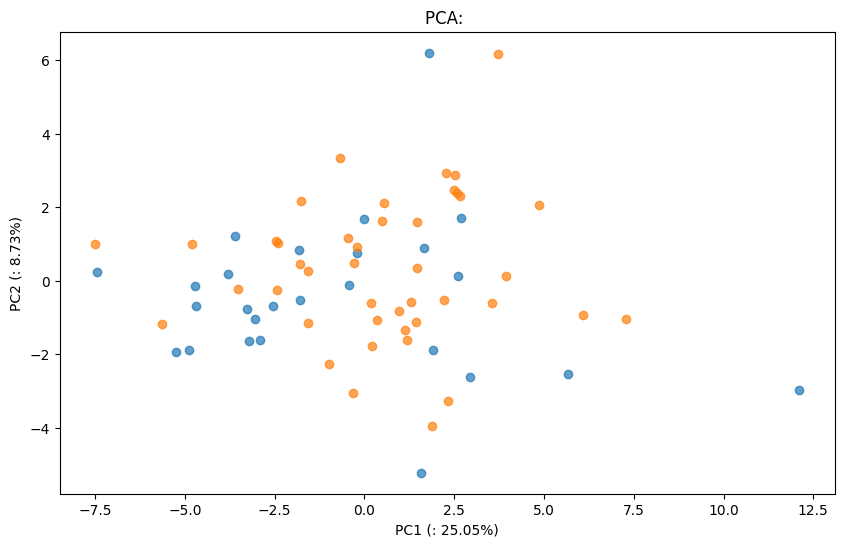

In [70]:
plt.figure(figsize=(10, 6))
for label in ['TD', 'ASD']:
    plt.scatter(X_pca[y == label, 0], 
                X_pca[y == label, 1], 
                label=f'Class {label}',
                alpha=0.7)
    
plt.xlabel(f'PC1 (: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA: ')

In [77]:
merged_df.columns[188:489]

Index(['chr17-36361992-36361992-C-T-LOC101929950',
       'chr16-21548095-21548095-G-A-SLC7A5P2',
       'chr1-144816621-144816621-A-G-NBPF8',
       'chrX-146341299-146341299-G-A-MIR509-3',
       'chr16-33379851-33379851-G-A-LOC390705',
       'chr1-16976223-16976223-C-T-MST1P2',
       'chr1-145282093-145282093-G-A-NOTCH2NLC',
       'chr16-33380263-33380263-C-G-LOC390705',
       'chr1-144874578-144874578-C-T-LOC100996724',
       'chr5-122737709-122737709-C-T-CEP120',
       ...
       'chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6',
       'chr12-31247819-31247819-A-G-DDX11',
       'chr5-99715833-99715833-T-A-LOC100133050',
       'chr6-58779097-58779097-A-G-LINC00680-GUSBP4',
       'chr11-18290636-18290636-A-T-SAA1', 'chr7-72081604-72081604-G-T-TYW1B',
       'chr2-112616040-112616040-T-C-ANAPC1',
       'chr6-58779097-58779097-A-G-NONE', 'chr1-121484945-121484945-T-C-NONE',
       'type'],
      dtype='object', length=287)

In [80]:
for i,col in enumerate(merged_df.columns[188:489]):
    X = alldata_pivot[organic_acid+[col]].iloc[:, :-1]    y = alldata_pivot[organic_acid+[col]].iloc[:, -1]    if len(y.unique())==1:
        print(col)

chr17-36361992-36361992-C-T-LOC101929950
chr16-21548095-21548095-G-A-SLC7A5P2
chr1-144816621-144816621-A-G-NBPF8
chrX-146341299-146341299-G-A-MIR509-3
chr16-33379851-33379851-G-A-LOC390705
chr1-16976223-16976223-C-T-MST1P2
chr1-145282093-145282093-G-A-NOTCH2NLC
chr16-33380263-33380263-C-G-LOC390705
chr1-144874578-144874578-C-T-LOC100996724
chr5-122737709-122737709-C-T-CEP120
chr14-24476433-24476433-C-G-DHRS4L1
chr15-22345038-22345038-T-C-LOC101927079
chr7-142467540-142467540-A-G-PRSS1
chr1-144676632-144676632-T-C-LOC653513
chr16-70177618-70177618-G-A-PDPR
chr1-145021024-145021024-G-C-LOC100996724
chrX-73811695-73811695-A-G-RLIM
chr1-16969246-16969246-G-A-MST1P2
chr1-148903758-148903758-A-G-LOC101060524
chr17-36339817-36339817-G-A-TBC1D3
chr7-48886193-48886193-G-A-CDC14C
chr17-36339817-36339817-G-A-TBC1D3F
chr6-58779121-58779121-C-T-LINC00680-GUSBP4
chr3-10106623-10106623-C-T-FANCD2
chr3-195447805-195447805-T-C-MUC20
chr16-32077240-32077240-T-C-ZNF267
chr14-106919301-106919301-T-C-LINC0

In [86]:
len(merged_df.columns[188:489])

287

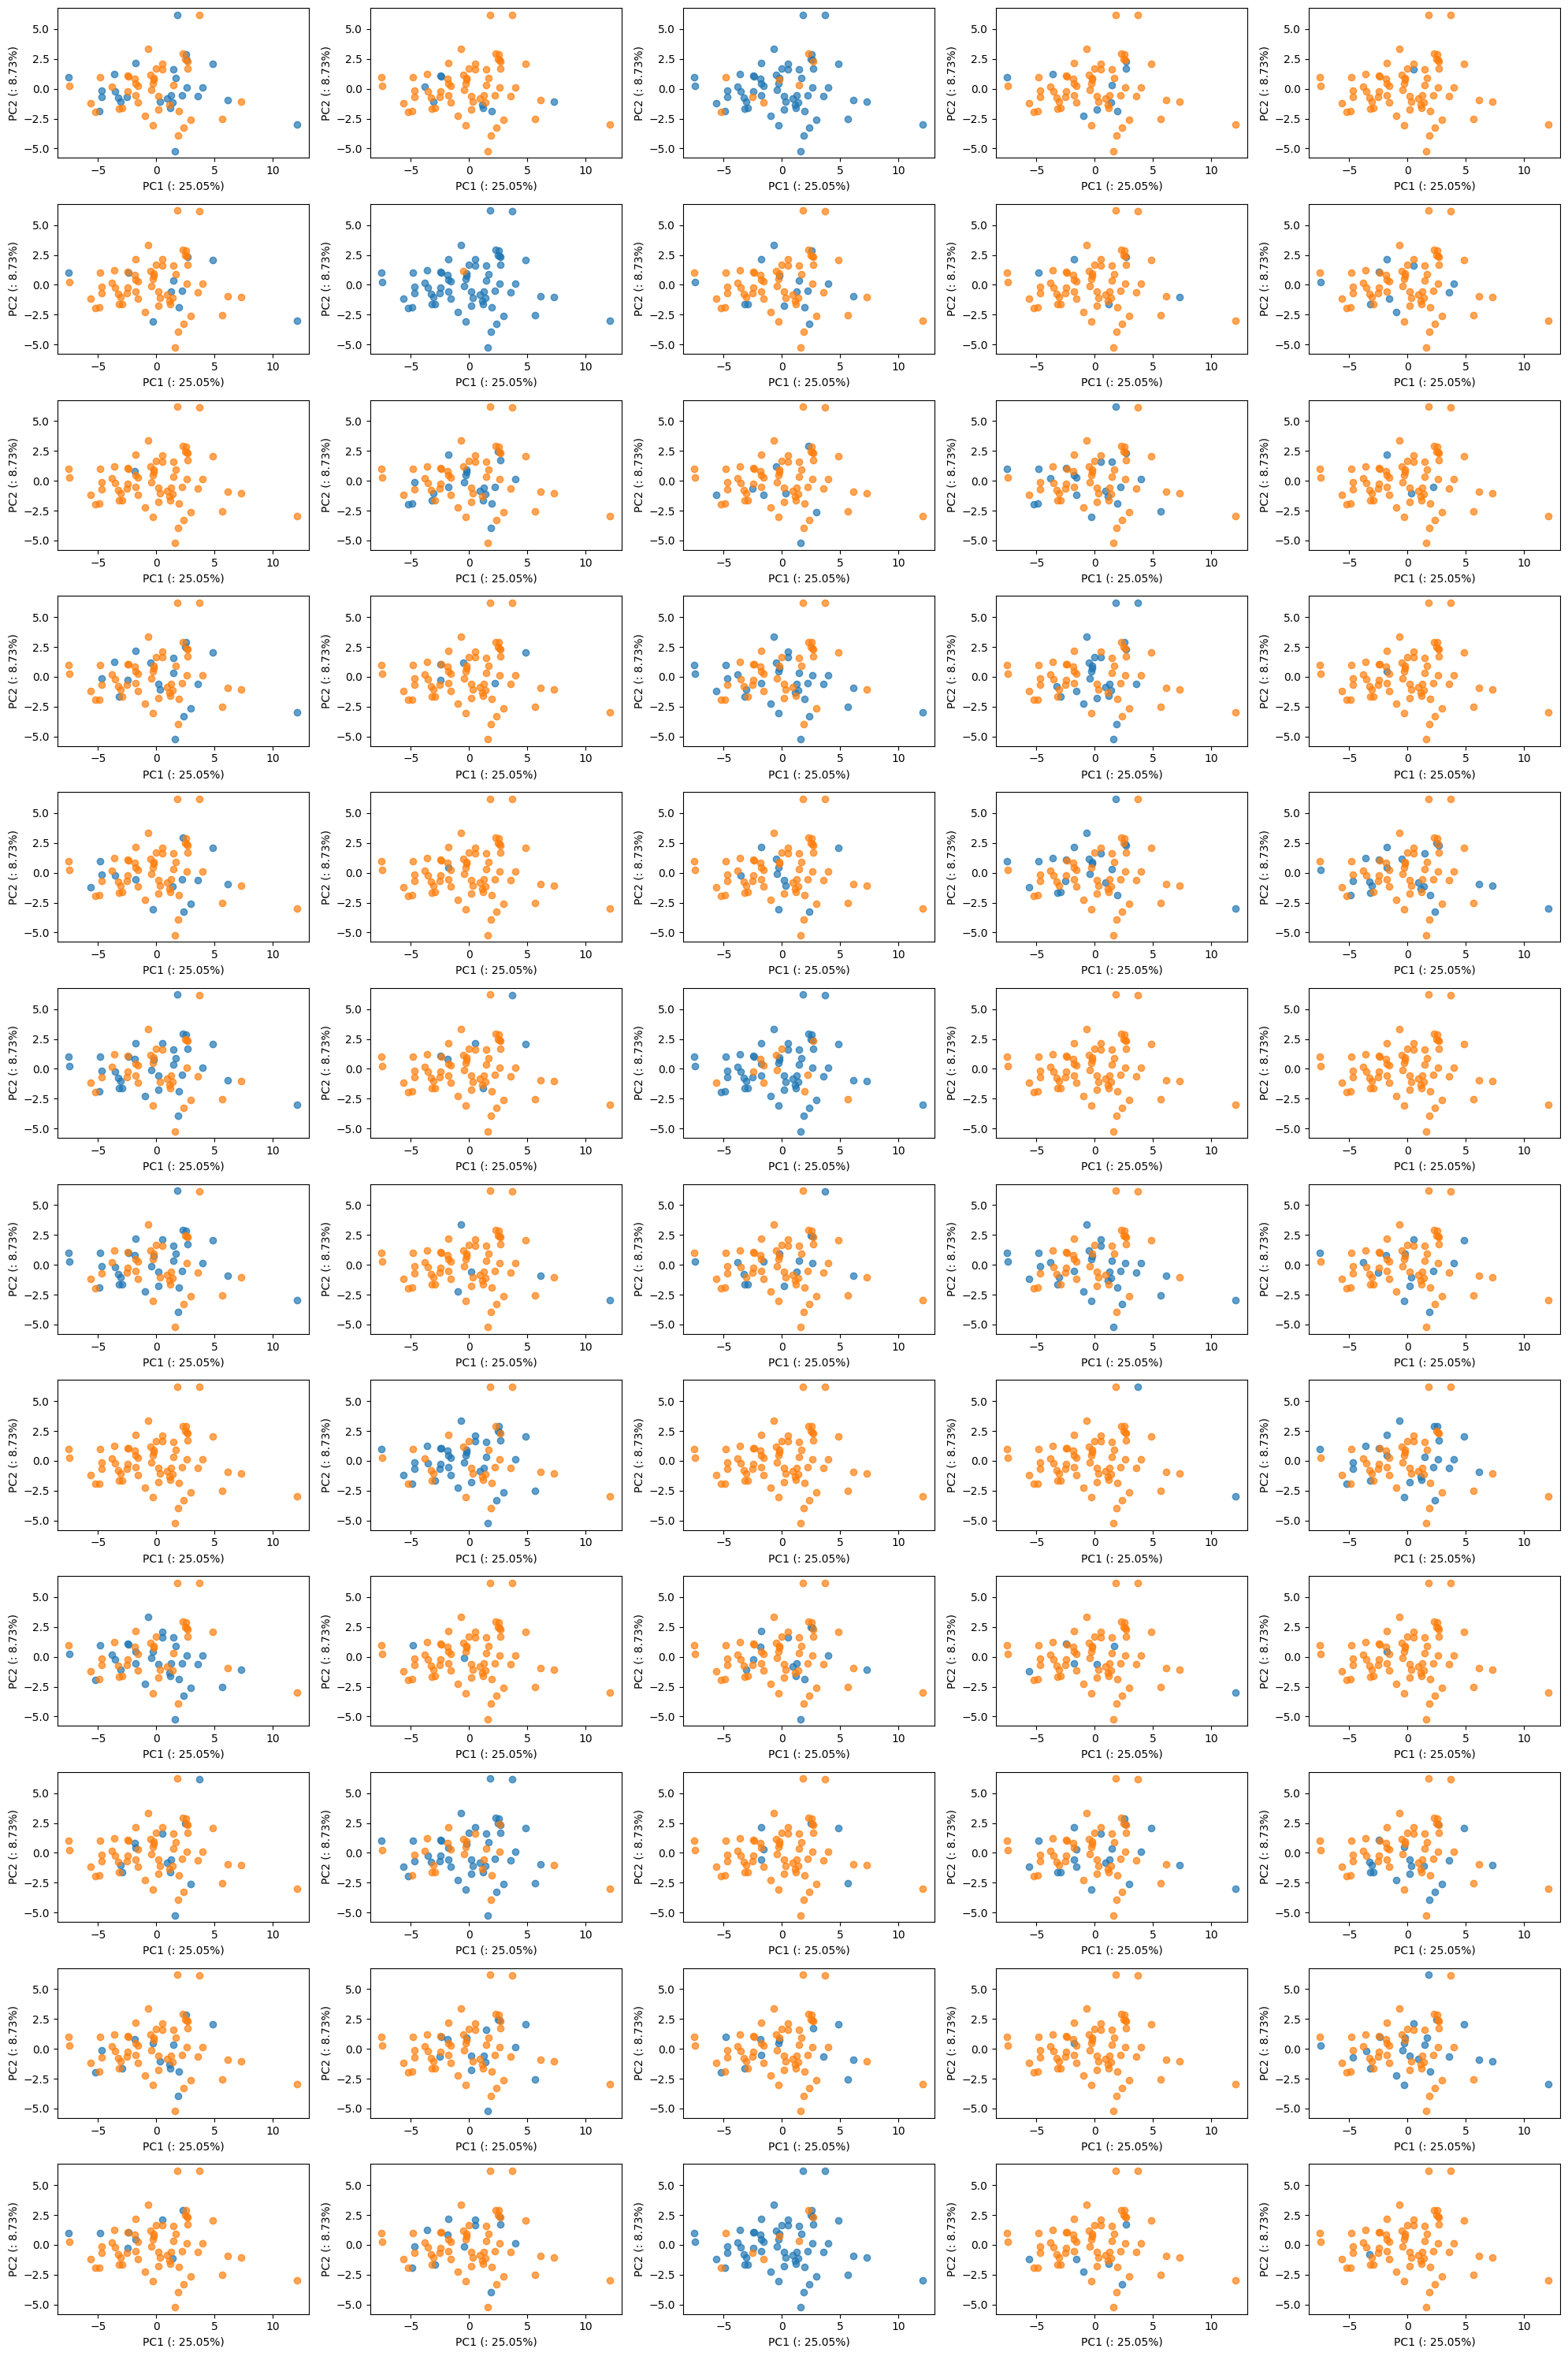

In [90]:
plt.subplots(figsize=(20,30))
for i,col in enumerate(merged_df.columns[188:489][:60]):
    X = merged_df[organic_acid+[col]].iloc[:, :-1]    y = merged_df[organic_acid+[col]].iloc[:, -1] 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)    X_pca = pca.fit_transform(X_scaled)
    plt.subplot(12,5,i+1)
    for label in ['mut', 'nonmutant']:
        plt.scatter(X_pca[y == label, 0], 
                    X_pca[y == label, 1], 
                    label=f'Class {label}',
                    alpha=0.7)

    plt.xlabel(f'PC1 (: {pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 (: {pca.explained_variance_ratio_[1]:.2%})')
    plt.tight_layout()
    

Text(0.5, 1.0, 'PCA: ')

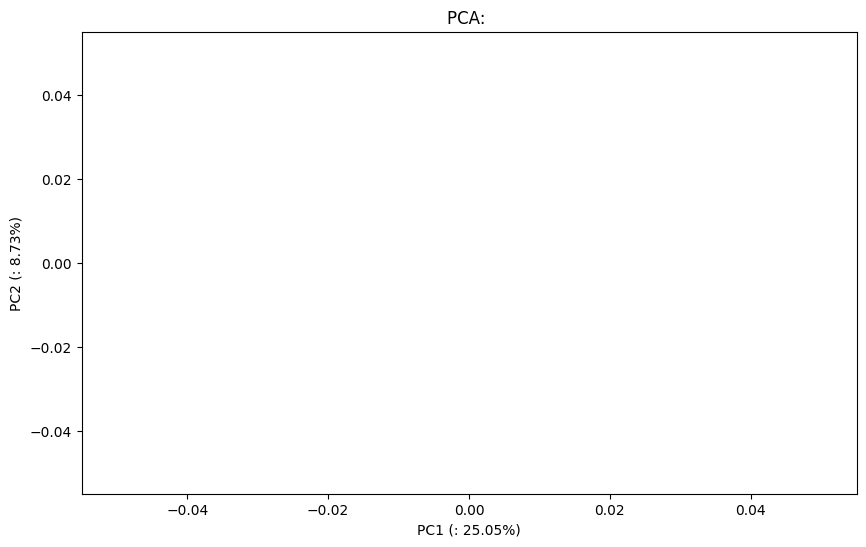

In [43]:
plt.figure(figsize=(10, 6))
for label in ['TD', 'ASD']:
    plt.scatter(X_pca[y == label, 0], 
                X_pca[y == label, 1], 
                label=f'Class {label}',
                alpha=0.7)
    
plt.xlabel(f'PC1 (: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA: ')

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


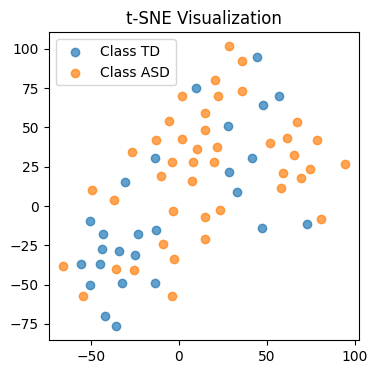

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


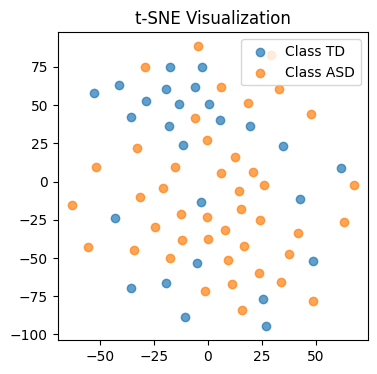

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


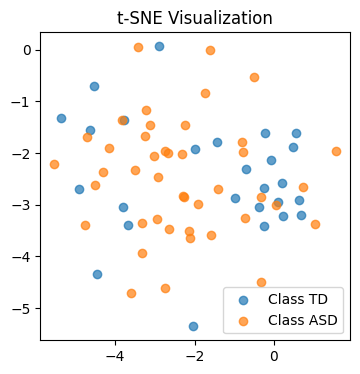

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


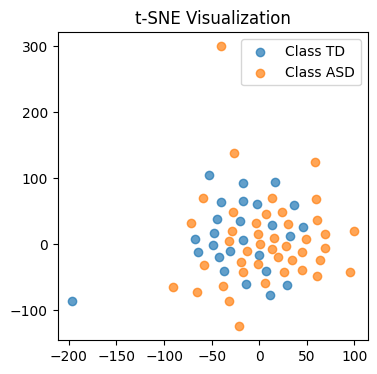

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


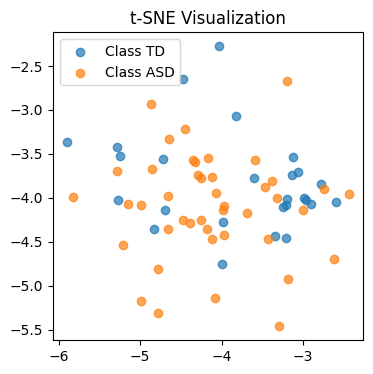

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


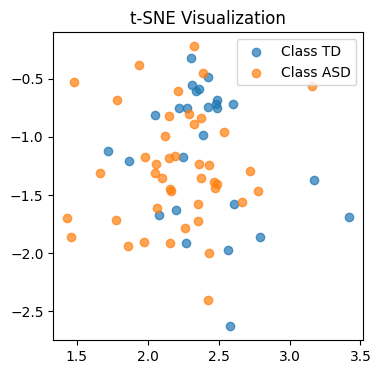

In [31]:
from sklearn.manifold import TSNE
for i in [10,20,30,40,50,60]:
    X_tsne = TSNE(n_components=2, perplexity=i, random_state=42).fit_transform(X_scaled)

    plt.figure(figsize=(4, 4))
    for label in ['TD', 'ASD']:
        plt.scatter(X_tsne[y == label, 0], 
                    X_tsne[y == label, 1], 
                    label=f'Class {label}',
                    alpha=0.7)
    plt.title('t-SNE Visualization')
    plt.legend()
    plt.show()

In [33]:
X = alldata_pivot[organic_acid+['type']].iloc[:, :-1]y = alldata_pivot[organic_acid+['type']].iloc[:, -1].map({'TD':0,'ASD':1})

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import load_iris

X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_new)

ari = adjusted_rand_score(y, clusters)
print(f"ARI Score: {ari:.2f}")

ARI Score: 0.09


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('your_data.csv')X = data.iloc[:, :-1]y = data.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for label in [0, 1]:
    plt.scatter(X_pca[y == label, 0], 
                X_pca[y == label, 1], 
                label=f'Class {label}',
                alpha=0.7)
    
plt.xlabel(f'PC1 (解释方差: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (解释方差: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA: 代谢组数据分类差异')
plt.legend()
plt.grid(True)
plt.show()

print("主成分解释方差比例:", pca.explained_variance_ratio_)
print("累计方差解释:", np.cumsum(pca.explained_variance_ratio_))

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, 
                             columns=['PC1', 'PC2'], 
                             index=X.columns)
print("\n代谢物对主成分的贡献（载荷矩阵前5行）:")
print(loading_matrix.head())

In [91]:
import gseapy as gp

In [92]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'COMPARTMENTS_Curated_2025',
 'COMPARTMENTS_Experimental_2025',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Scre

In [96]:
gp.get_library(name='Metabolomics_Workbench_Metabolites_2022', organism='Human')

{'(S)-Methylmalonate Semialdehyde': ['ALDH3A2',
  'ALDH7A1',
  'ALDH6A1',
  'HIBADH',
  'ALDH1B1',
  'ALDH2',
  'AOX1',
  'EHHADH',
  'ALDH9A1',
  'HADH'],
 '1,2-Diacyl-sn-glycerol': ['DGAT2',
  'DGAT1',
  'PLCH1',
  'DGKZ',
  'PIGF',
  'PLCB4',
  'LPIN1',
  'CHPT1',
  'DGKQ',
  'PLCD1',
  'PIGN',
  'PLCH2',
  'LPIN2',
  'PLCB2',
  'DGKK',
  'LPIN3',
  'PIGG',
  'PLCB3',
  'PNPLA2',
  'DGKI',
  'PLCB1',
  'PLCD3',
  'PNLIP',
  'PNPLA3',
  'DGKH',
  'DGKG',
  'DGKE',
  'PNLIPRP1',
  'DGKD',
  'SGMS2',
  'PIGO',
  'SGMS1',
  'DGKB',
  'DGKA',
  'LIPC',
  'PLCZ1',
  'PLCE1',
  'PLCG1',
  'PLCG2'],
 '1-(1-Alkenyl)-sn-glycero-3-phosphoethanolamine': ['PLA2G2E',
  'PLA2G2F',
  'PLA2G1B',
  'PLA2G4E',
  'PLA2G2D',
  'PLA2G4F',
  'PLA2G2A',
  'PLA2G4C',
  'PLA2G4D',
  'PLA2G3',
  'PLA2G4A',
  'PLA2G4B',
  'PLA2G5',
  'PLA2G6',
  'PLB1',
  'LPCAT4',
  'PLA2G10'],
 '1-Acyl-sn-glycero-3-phosphocholine': ['PLA2G2E',
  'LYPLA1',
  'PLA2G2F',
  'PLA2G1B',
  'PLA2G4E',
  'PLA2G2D',
  'PLA2G4F',
  'PL

In [97]:
gp.get_library(name='PFOCR_Pathways_2023', organism='Human')

{'PMC102186 F9': ['ATF2', 'NRAS', 'RHOA', 'SRF', 'RAC1', 'ELK1', 'RAF1'],
 'PMC1064894 F3': ['TLR2',
  'MYD88',
  'TLR1',
  'IRF3',
  'TRAF6',
  'TIRAP',
  'TLR9',
  'TLR7',
  'TLR5',
  'TLR4',
  'TLR3'],
 'PMC1069621 F5': ['WEE1', 'MYC', 'CRY2', 'TIMELESS', 'ATR', 'ATRIP'],
 'PMC1083688 F2': ['TBP', 'CAT', 'POP1', 'NLK', 'POLI'],
 'PMC1087229 F8': ['RAC1', 'NGF', 'VAV2', 'CDC42', 'SOS1', 'VAV3'],
 'PMC1087506 F8': ['MYD88', 'JUN', 'TRADD', 'TRAF6', 'FOS', 'IRAK4', 'TRAF2'],
 'PMC1124928 F4': ['TF', 'TRF', 'F12', 'PLG', 'PF4', 'TFPI'],
 'PMC1140402 F2': ['ACE', 'MAL', 'MET', 'CIT', 'TYR'],
 'PMC1143566 F2': ['DHH', 'SHH', 'SMO', 'SUFU', 'IHH'],
 'PMC114459 F1': ['STAT1', 'STAT2', 'IRF3', 'IRF9', 'TYK2'],
 'PMC1174965 F4': ['MYD88', 'SOCS1', 'STAT1', 'IFNG', 'IRF3', 'TRAF6'],
 'PMC1175050 F1': ['MYD88', 'CD40', 'JUN', 'TRAF6', 'FOS', 'TNF', 'RELB'],
 'PMC1183194 F4': ['CASP8',
  'STAT1',
  'APAF1',
  'BAD',
  'STAT3',
  'BCL2',
  'CASP3',
  'TNF',
  'CSK',
  'CYC1',
  'HSPB1',
  'RAF1']